# Preparation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
so_2011 = pd.read_csv("./stack-overflow-developer-survey-2011/2011 Stack Overflow Survey Results.csv",
                      encoding="utf-8", encoding_errors='ignore')
so_2012 = pd.read_csv("./stack-overflow-developer-survey-2012/2012 Stack Overflow Survey Results.csv",
                      encoding="utf-8", encoding_errors='ignore')
so_2013 = pd.read_csv("./stack-overflow-developer-survey-2013/2013 Stack Overflow Survey Responses.csv",
                      encoding="utf-8", encoding_errors='ignore')
so_2014 = pd.read_csv("./stack-overflow-developer-survey-2014/2014 Stack Overflow Survey Responses.csv",
                      encoding="utf-8", encoding_errors='ignore')
so_2015 = pd.read_csv("./stack-overflow-developer-survey-2015/2015 Stack Overflow Developer Survey Responses.csv",
                      encoding="utf-8", encoding_errors='ignore', header=1)
so_2016 = pd.read_csv("./stack-overflow-developer-survey-2016/2016 Stack Overflow Survey Responses.csv",
                      encoding="utf-8", encoding_errors='ignore')
so_2017 = pd.read_csv("./stack-overflow-developer-survey-2017/survey_results_public.csv", encoding="utf-8", encoding_errors='ignore')
so_2018 = pd.read_csv("./stack-overflow-developer-survey-2018/survey_results_public.csv", encoding="utf-8", encoding_errors='ignore')
so_2019 = pd.read_csv("./stack-overflow-developer-survey-2019/survey_results_public.csv", encoding="utf-8", encoding_errors='ignore')
so_2020 = pd.read_csv("./stack-overflow-developer-survey-2020/survey_results_public.csv", encoding="utf-8", encoding_errors='ignore')
so_2021 = pd.read_csv("./stack-overflow-developer-survey-2021/survey_results_public.csv", encoding="utf-8", encoding_errors='ignore')

C:\Users\Tristan\AppData\Local\Temp\ipykernel_17660\3148506000.py:5: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  so_2013 = pd.read_csv("./stack-overflow-developer-survey-2013/2013 Stack Overflow Survey Responses.csv",
C:\Users\Tristan\AppData\Local\Temp\ipykernel_17660\3148506000.py:9: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  so_2015 = pd.read_csv("./stack-overflow-developer-survey-2015/2015 Stack Overflow Developer Survey Responses.csv",
C:\Users\Tristan\AppData\Local\Temp\ipykernel_17660\3148506000.py:14: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set lo

# Operating System Analysis

In [31]:
# Selecting Columns

so_2011_os = so_2011["What operating system do you use the most?"]
so_2012_os = so_2012["Which desktop operating system do you use the most?"]
so_2013_os = so_2013["Which desktop operating system do you use the most?"]
so_2014_os = so_2014["Which desktop operating system do you use the most?"]
so_2015_os = so_2015["Desktop Operating System"]
so_2016_os = so_2016["desktop_os"]
so_2017_os = so_2016_os # there is no OS question in the 2017 survey, therefore filling in the gap with 2016 survey data
so_2018_os = so_2018["OperatingSystem"]
so_2019_os = so_2019["OpSys"]
so_2020_os = so_2020["OpSys"]
so_2021_os = so_2021["OpSys"]

os_data_list = [so_2011_os, so_2012_os, so_2013_os, so_2014_os, so_2015_os,
                so_2016_os, so_2017_os, so_2018_os, so_2019_os, so_2020_os, so_2021_os]

# Iterating through each year of data and cleaning it
for index, os_data in enumerate(os_data_list):

    # Removing NaN values
    os_data_list[index] = os_data_list[index].dropna()

    # Removing the single response values from the earlier survey datasets
    os_data_list[index] = os_data_list[index][os_data != "Response"]

    # Replacing different Windows versions with just 'Windows'
    os_data_list[index] = os_data_list[index].str.replace("Windows.*", "Windows", regex=True)

    # Replacing 'Mac OS X' & 'MacOS versions with 'MacOS'
    os_data_list[index] = os_data_list[index].str.replace("Mac.*", "MacOS", regex=True)

    # Replacing various Linux distributions with just 'Linux'
    os_data_list[index] = os_data_list[index].str.replace(".*Linux.*|Ubuntu|Debian|Mint|Fedora", "Linux", regex=True)

    # Removing Other values (e.g 'Other', 'BSD') since they are missing in some years and statistically insignificant
    os_data_list[index] = os_data_list[index][~os_data_list[index].str.contains("Other|BSD")]

In [32]:
# Analyzing the data to find what perecentage of market share each OS has at a given year

os_list = ["Windows", "MacOS", "Linux"]
os_data_dict = {'Year': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']}

for os_name in os_list:
    os_percentage_list = []
    for i in range(len(os_data_list)):
        os_percentage_list.append(round((os_data_list[i].value_counts()[os_name]/len(os_data_list[i]))*100, 2))
    os_data_dict[os_name] = os_percentage_list.copy()

os_data_df = pd.DataFrame(columns=['Year', 'Windows', 'MacOS', 'Linux'], data=os_data_dict)
os_data_df

,Year,Windows,MacOS,Linux
0,2011,66.14,15.64,18.22
1,2012,61.04,18.83,20.13
2,2013,58.43,20.50,21.07
3,2014,59.51,18.95,21.54
4,2015,56.53,22.23,21.23
5,2016,52.15,26.16,21.69
6,2017,52.15,26.16,21.69
7,2018,50.01,26.73,23.26
8,2019,47.55,26.83,25.62
9,2020,48.36,25.05,26.58


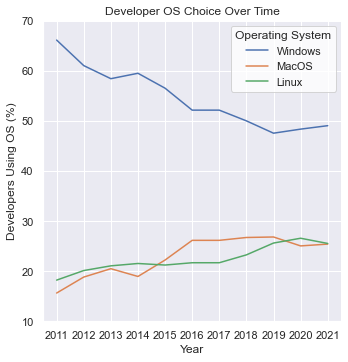

In [33]:
# Producing a visualisation showing OS market share over time

sns.set_theme(style="darkgrid");
g = sns.relplot(x="Year", y='value', hue='variable', kind="line", data=pd.melt(
    os_data_df, ['Year']), legend=False).set(title='Developer OS Choice Over Time');
g.ax.set(ylim=(10, 70), ylabel='Developers Using OS (%)');
plt.legend(title='Operating System', labels=['Windows', 'MacOS', 'Linux'], facecolor='white', loc='upper right');
plt.rcParams['figure.dpi'] = 100

# Language Analysis

In [34]:
def produce_language_dict(so_data, key):
    # Produces a dictionary with each key being a programming language and the value being its count in the developer community

    # Parameters:
    #    so_data (Pandas DataFrame): The dataframe of a given year of stack overflow survey data
    #    key (String): The key for the appropriate language column

    # Returns:
    #    language_dict (Dictionary): A dictionary of languages and their counts
     
    language_dict = {}
    for value in so_data[key].dropna():
        for lang in value.split(";"):
            if lang in language_dict:
                language_dict[lang] += 1
            else:
                language_dict[lang] = 1
    return language_dict

def get_top_languages(language_dict, top_num):
    # Finds the most popular languages in the language dictionaries produced by the produce_language_dict function

    # Parameters:
    #    language_dict (Dictionary): The language dictionary to be used
    #    top_num (Integer): The top X number of languages to find

    # Returns:
    #    {} (Dictionary): A new dictionary containing the top X languages of the given dictionary

    return {k: v for k, v in sorted(language_dict.items(), key=lambda item: item[1], reverse=True)[:top_num]}

def produce_language_visualisation(language_dict, year_string):
    # Produces a plot for a given language dictionary as produced by the produce_language_dict function

    # Parameters:
    #    language_dict (Dictionary): The language dictionary to be used
    #    year_string (String): The year of the survey data, to be used for the plot heading

    # Returns:
    #    plot (sns.Barplot): A seaborn barplot with the appropriate data and settings

    keys = list(language_dict.keys())
    vals = list(language_dict.values())
    plt.rcParams['figure.dpi'] = 150
    plot = sns.barplot(x=keys, y=vals);
    plot.set(title=f'Developers Most Used Languages in {year_string}')
    plot.tick_params(labelsize=5);
    plot.set_xticklabels(plot.get_xticklabels(), rotation=-60);
    return plot
    

In [35]:
# Organising survey data
so_2018_language_dict = produce_language_dict(so_2018, "LanguageWorkedWith")
so_2021_language_dict = produce_language_dict(so_2021, "LanguageHaveWorkedWith")

# Combining HTML and CSS, as it is done in later surveys. CSS can be deleted since there are slightly more HTML users.
del so_2018_language_dict["CSS"]
so_2018_language_dict["HTML/CSS"] = so_2018_language_dict.pop("HTML") # renaming HTML key to HTML/CSS

# Identifying the top 20 languages of 2018
so_2018_language_dict = get_top_languages(so_2018_language_dict, 20)

# Identifying the top 20 languages of 2021
so_2021_language_dict = get_top_languages(so_2021_language_dict, 20)

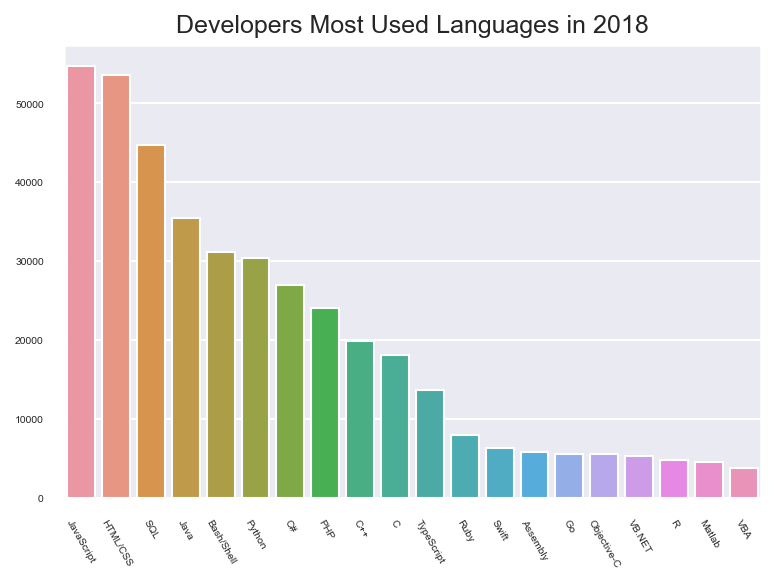

In [36]:
plot = produce_language_visualisation(so_2018_language_dict, "2018")

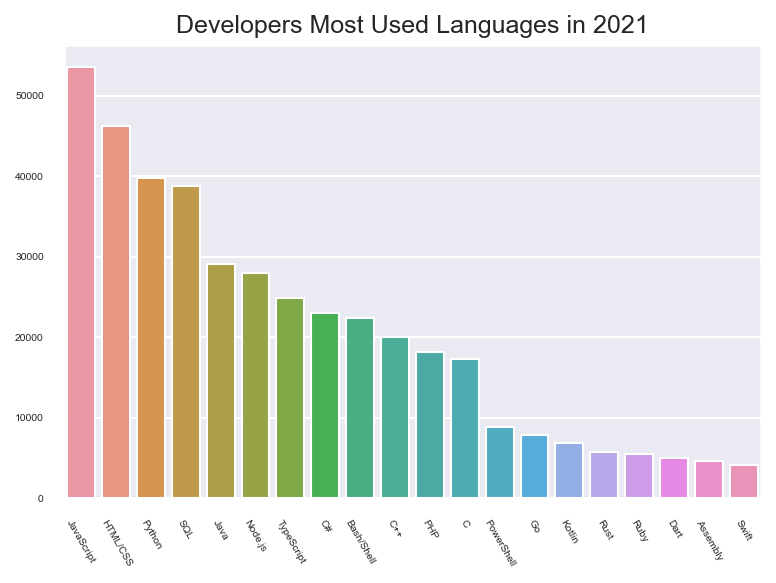

In [37]:
plot = produce_language_visualisation(so_2021_language_dict, "2021")

# Gender Analysis

In [38]:
# Survey questions on gender begin in 2014

# Selecting Columns
so_2014_gender = so_2014["What is your gender?"]
so_2015_gender = so_2015["Gender"]
so_2016_gender = so_2016["gender"]
so_2017_gender = so_2017["Gender"]
so_2018_gender = so_2018["Gender"]
so_2019_gender = so_2019["Gender"]
so_2020_gender = so_2020["Gender"]
so_2021_gender = so_2021["Gender"]

gender_data_list = [so_2014_gender, so_2015_gender, so_2016_gender, so_2017_gender, so_2018_gender, so_2019_gender, so_2020_gender, so_2021_gender]

# Iterating through each year of data and cleaning it
for index, gender_data in enumerate(gender_data_list):

    # Removing NaN values
    gender_data_list[index] = gender_data_list[index].dropna()

    # Removing prefer not to say values, response values etc
    gender_data_list[index] = gender_data_list[index][~gender_data_list[index].str.contains("Prefer|prefer|Response")]

    # Streamlining 'Male'
    gender_data_list[index] = gender_data_list[index].str.replace(".*Man.*", "Male", regex=True)

    # Streamlining 'Female'
    gender_data_list[index] = gender_data_list[index].str.replace(".*Woman.*", "Female", regex=True)

    # Streamlining 'other'
    gender_data_list[index] = gender_data_list[index].str.replace(".*Other.*|.*Trans.*|.*conform.*|.*own.*|.*;.*", "Other", regex=True)

gender_data_list[0][0] = "Other" # need to add one instance of other to value count of 2014 data

In [39]:
# calculating relative share of genders in the developer community by each year

gender_list = ["Male", "Female", "Other"]
gender_data_dict = {'Year': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']}

for os_name in gender_list:
    os_percentage_list = []
    for i in range(len(gender_data_list)):
        os_percentage_list.append(round((gender_data_list[i].value_counts()[os_name]/len(gender_data_list[i]))*100, 2))
    gender_data_dict[os_name] = os_percentage_list.copy()

gender_data_df = pd.DataFrame(columns=["Year", "Male", "Female", "Other"], data=gender_data_dict)
gender_data_df["Other"][0] = 0
gender_data_df

C:\Users\Tristan\AppData\Local\Temp\ipykernel_17660\1217861638.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_data_df["Other"][0] = 0


,Year,Male,Female,Other
0,2014,95.11,4.88,0.00
1,2015,93.65,5.85,0.51
2,2016,93.66,5.84,0.50
3,2017,90.13,7.42,2.45
4,2018,92.23,6.24,1.53
5,2019,91.68,7.62,0.70
6,2020,91.45,7.79,0.76
7,2021,93.30,5.31,1.39


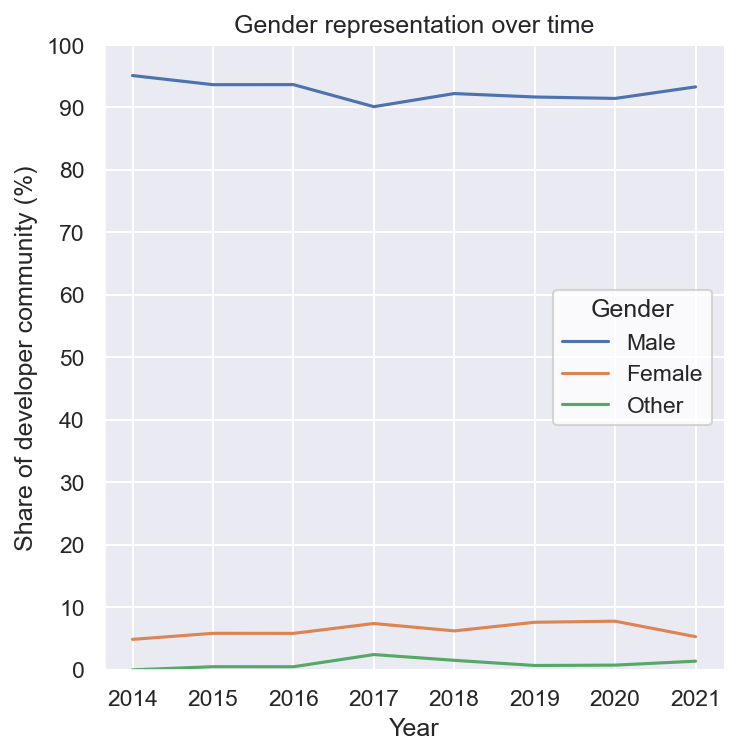

In [40]:
# producing a visualisation of gender representation in the developer community over time

g = sns.relplot(x="Year", y='value', hue='variable', kind="line", data=pd.melt(
    gender_data_df, ['Year']), legend=False).set(title='Gender representation over time');
g.ax.set(ylim=(0, 100), ylabel='Share of developer community (%)');
plt.legend(title='Gender', labels=['Male', 'Female', 'Other'], facecolor='white', loc='center right');
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);

# Country Analysis

In [41]:
# Selecting Columns

so_2011_country = so_2011["What Country or Region do you live in?"]
so_2012_country = so_2012["What Country or Region do you live in?"]
so_2013_country = so_2013["What Country or Region do you live in?"]
so_2014_country = so_2014["What Country do you live in?"]
so_2015_country = so_2015["Country"]
so_2016_country = so_2016["country"]
so_2017_country = so_2017["Country"]
so_2018_country = so_2018["Country"]
so_2019_country = so_2019["Country"]
so_2020_country = so_2020["Country"]
so_2021_country = so_2021["Country"]

country_data_list = [
    so_2011_country, so_2012_country, so_2013_country, so_2014_country, so_2015_country, so_2016_country, so_2017_country, so_2018_country, so_2019_country, so_2020_country, so_2021_country
]

# Iterating through each year of data and cleaning it
for index, country_data in enumerate(country_data_list):

    # Removing NaN values
    country_data_list[index] = country_data_list[index].dropna()

    # Streamlining Countries
    country_data_list[index] = country_data_list[index].str.replace(".*United States.*", "United States", regex=True)
    country_data_list[index] = country_data_list[index].str.replace(".*United Kingdom.*", "United Kingdom", regex=True)

    # These four countries (United States, United Kingdom, India, Germany) are most common across timeframe
    country_data_list[index] = country_data_list[index][country_data_list[index].isin(["United States", "United Kingdom", "India", "Germany"])]

In [42]:
# Calculating country share of developer community by country of residence

country_list = ["United States", "United Kingdom", "India", "Germany"]
country_data_dict = {'Year': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']}

for country_name in country_list:
    country_percentage_list = []
    for i in range(len(country_data_list)):
        country_percentage_list.append(round((country_data_list[i].value_counts()[country_name]/len(country_data_list[i]))*100, 2))
    country_data_dict[country_name] = country_percentage_list.copy()

country_data_df = pd.DataFrame(columns=["Year", "United States", "United Kingdom", "India", "Germany"], data=country_data_dict)
country_data_df

,Year,United States,United Kingdom,India,Germany
0,2011,66.82,20.23,6.12,6.83
1,2012,56.06,18.50,16.87,8.57
2,2013,58.52,17.20,13.56,10.72
3,2014,50.85,17.23,21.05,10.87
4,2015,40.96,20.74,21.24,17.06
5,2016,51.70,17.46,16.01,14.83
6,2017,45.47,17.45,20.63,16.45
7,2018,43.48,13.32,29.37,13.83
8,2019,50.34,13.79,21.77,14.10
9,2020,43.51,13.59,29.32,13.57


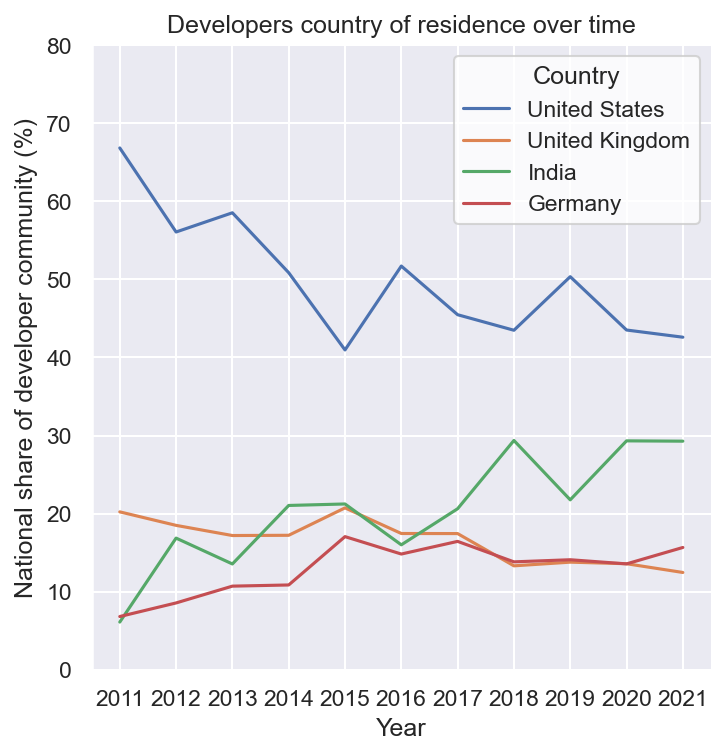

In [43]:
# Producing a visualisation of most common countries of residence in the developer community over time

g = sns.relplot(x="Year", y='value', hue='variable', kind="line", data=pd.melt(
    country_data_df, ['Year']), legend=False).set(title='Developers country of residence over time');
g.ax.set(ylim=(0, 80), ylabel='National share of developer community (%)');
plt.legend(title='Country', labels=['United States', 'United Kingdom', 'India', 'Germany'], facecolor='white', loc='upper right');